# 🎬 **Movies Analytics: Revenue, ROI, Genres & Director Performance**

### **A Mini Project on Exploratory Data Analysis (EDA) of Movies Dataset**

This project explores a comprehensive movie metadata dataset and uncovers insights related to:

- 🎭 **Genre Popularity**
- 📅 **Movie Releases Per Year**
- 💸 **Budget vs Revenue Trends**
- 📈 **Profit & ROI (Return on Investment) Analysis**
- 🎬 **Top Directors by Average Revenue**
- ⭐ **Ratings & Popularity Behaviour**

Using Python libraries like **Pandas**, **Matplotlib**, and **Seaborn**, this project provides a clear understanding of patterns and trends in the movie industry through visualizations and statistical exploration.

---


In [576]:
import pandas as pd                             # import pandas library as pd
df = pd.read_csv("Imdbmovies_dataset.csv")      # read the CSV file into a DataFrame
print(df.shape)                                 # print number of rows and columns in the dataset


(4803, 24)


In [577]:
df.columns                                      # display all column names present in the DataFrame


Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director'],
      dtype='object')

In [578]:
df.head()                                      # show the first 5 rows of the DataFrame


,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [579]:
df.info()                                      # display summary of the DataFrame including column types and non-null counts


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

In [580]:
df.isnull().sum()                               # show total number of missing values in each column

index                      0
budget                     0
genres                    28
homepage                3091
id                         0
keywords                 412
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                      43
crew                       0
director                  30
dtype: int64

In [581]:
drop_cols = [
    'homepage', 
    'tagline', 
    'keywords',
    'spoken_languages',
    'production_companies',                          # list of columns that we want to remove from the dataset
    'production_countries',
    'cast',
    'crew',
    'overview',
    'id',
    'index'
]

df = df.drop(columns=drop_cols, errors='ignore')     # drop the above columns from the DataFrame (ignore if any column is missing) 


In [582]:
df.columns                                           # display the updated list of column names after dropping columns
                     

Index(['budget', 'genres', 'original_language', 'original_title', 'popularity',
       'release_date', 'revenue', 'runtime', 'status', 'title', 'vote_average',
       'vote_count', 'director'],
      dtype='object')

In [583]:
df.isnull().sum()                                    # check how many missing values remain in each column


budget                0
genres               28
original_language     0
original_title        0
popularity            0
release_date          1
revenue               0
runtime               2
status                0
title                 0
vote_average          0
vote_count            0
director             30
dtype: int64

In [584]:
num_cols = ['runtime',                                # columns where we want to fill missing values
            'release_date'
           ]
for col in num_cols:
    df[col] = df[col].fillna(0)                       # fill NaN values with 0 for each selected column

In [585]:
text_cols=[ 'genres',
           'director'                                 # text columns in which we want to fill missing value
          ]
for cols in text_cols:                                # text columns in which we want to fill missing value
    df[cols]= df[cols].fillna(" ")

In [586]:
df.isnull().sum()                                      # check how many missing values remain in each column(After removing null values.)

budget               0
genres               0
original_language    0
original_title       0
popularity           0
release_date         0
revenue              0
runtime              0
status               0
title                0
vote_average         0
vote_count           0
director             0
dtype: int64

In [587]:
df.columns.tolist()                                     # convert all column names into a Python list

['budget',
 'genres',
 'original_language',
 'original_title',
 'popularity',
 'release_date',
 'revenue',
 'runtime',
 'status',
 'title',
 'vote_average',
 'vote_count',
 'director']

In [588]:
                                                        # remove unwanted characters from release_date, keeping only digits and hyphens
df['release_date'] = df['release_date'].str.replace(r'[^\d\-]', '', regex=True)                     
                                                        # remove unwanted characters from release_date, keeping only digits and hyphens
df['release_date'] = pd.to_datetime(df['release_date'], format='%Y-%m-%d', errors='coerce')
                                                        # extract only the year from the release_date column
df['release_year'] = df['release_date'].dt.year


In [589]:
df[['release_date','release_year']].head()              # show first 5 rows of release_date and release_year columns


,release_date,release_year
0,2009-12-10,2009.0
1,2007-05-19,2007.0
2,2015-10-26,2015.0
3,2012-07-16,2012.0
4,2012-03-07,2012.0


In [590]:
official_genres=['Drama',
         'Comedy',
         'Thriller',
         'Action',
         'Romance',
         'Adventure',
         'Crime',
         'Science Fiction',                             # list of official movie genres to be used for filtering or matching
         'Horror',
         'Family',
         'Fantasy',
         'Mystery',
         'Animation',
         'History',
         'Music',
         'War',
         'Documentary',
         'Western',
         'Foreign',
         'TV Movie']

In [591]:
def extract_genres(text):                               
    if pd.isnull(text):                                  # return empty list if the text value is NaN
        return []
    
    genres_found = []                                    # list to store matched genres
    for i in official_genres:                            # check each official genre and add it if present in text
        if i in text:
            genres_found.append(i)
    return genres_found                                  # return list of matched genres


In [592]:
df['genre_list'] = df['genres'].apply(extract_genres)    # create new column with extracted genre list for each movie


In [593]:
df['genre_list']                                         # display the extracted genres for each row

0       [Action, Adventure, Science Fiction, Fantasy]
1                        [Action, Adventure, Fantasy]
2                          [Action, Adventure, Crime]
3                    [Drama, Thriller, Action, Crime]
4                [Action, Adventure, Science Fiction]
                            ...                      
4798                        [Thriller, Action, Crime]
4799                                [Comedy, Romance]
4800               [Drama, Comedy, Romance, TV Movie]
4801                                               []
4802                                    [Documentary]
Name: genre_list, Length: 4803, dtype: object

In [594]:
from collections import Counter                            # import Counter to count genre frequency
                                                           # flatten the genre_list column and count how many times each genre appears
genre_count = Counter([g for sub in df['genre_list'] for g in sub])                 


In [595]:
print(genre_count)                                         # print the count of each genre

Counter({'Drama': 2297, 'Comedy': 1722, 'Thriller': 1259, 'Action': 1153, 'Romance': 890, 'Adventure': 790, 'Crime': 696, 'Science Fiction': 530, 'Horror': 519, 'Family': 510, 'Fantasy': 418, 'Mystery': 347, 'Animation': 234, 'History': 197, 'Music': 183, 'War': 142, 'Documentary': 110, 'Western': 80, 'Foreign': 34, 'TV Movie': 8})


--------------------------------------------------------------------------------------------------------------------------------------------------------




### 📌 Pre-Analysis Insights Overview

Before generating the visualizations, we can understand a few expectations based on the dataset’s structure:

- The dataset covers multiple movie industries, languages, and production companies, so trends may vary across years and genres.
- Budget and revenue values are highly skewed — only a few movies have extremely high budgets or earnings. We expect this to affect correlation patterns.
- Genres are stored as structured lists, so extracting and analyzing them will help us understand which categories dominate the dataset.
- Movie releases per year might show uneven patterns depending on data availability and industry production trends.
- Certain top directors may consistently generate high revenue, indicating strong audience pull or big-studio backing.
- Popularity and vote counts suggest how audience engagement differs across movies, which may indirectly influence revenue and ratings.

These observations guide the need for visual exploration to validate assumptions and identify hidden patterns.

--------------------------------------------------------------------------------------------------------------------------------------------------------

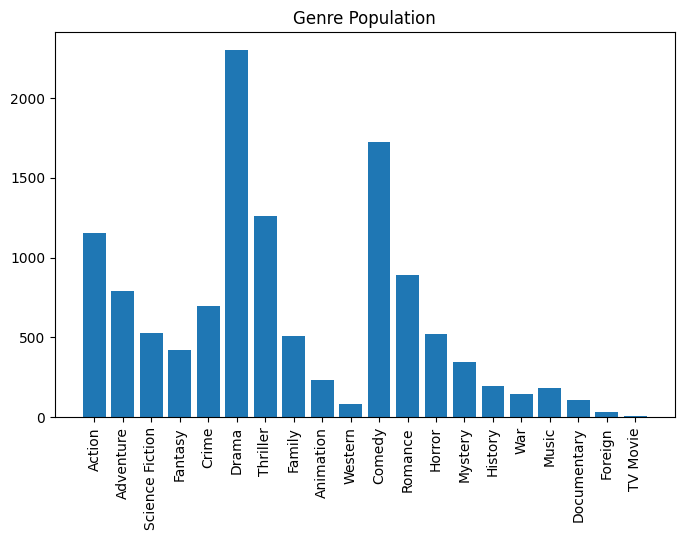

In [596]:
import matplotlib.pyplot as plt                            # import matplotlib for plotting

plt.figure(figsize=(8,5))                                  # set figure size
plt.bar(genre_count.keys(),genre_count.values())           # create bar chart of genre counts
plt.title("Genre Population")                              # add title to the chart
plt.xticks(rotation=90)                                    # rotate x-labels for better readability
plt.show()             # display the plot

### 🔍 Insight: Genre Popularity
- Some genres dominate the dataset (like Action, Drama, Adventure).
- Less frequent genres may indicate niche content or limited production.
- High-frequency genres usually correlate with higher budgets & audience reach.


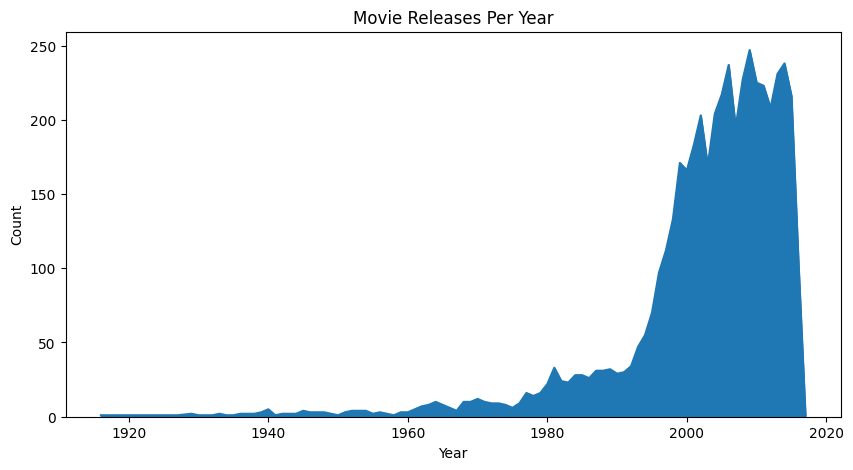

In [597]:
                                                              # plot movie counts per year as an area chart
df['release_year'].value_counts().sort_index().plot(kind='area', figsize=(10,5))
plt.title("Movie Releases Per Year")                          # plot movie counts per year as an area chart 
plt.xlabel("Year")                                            # x-axis label
plt.ylabel("Count")                                           # y-axis label
plt.show()


### 🔍 Insight: Year-wise Movie Release Trend
- Certain years show spikes, indicating higher production activity.
- Some years have fewer movies, possibly due to industry changes or missing data.
- Trends help understand growth or decline of movie production over time.


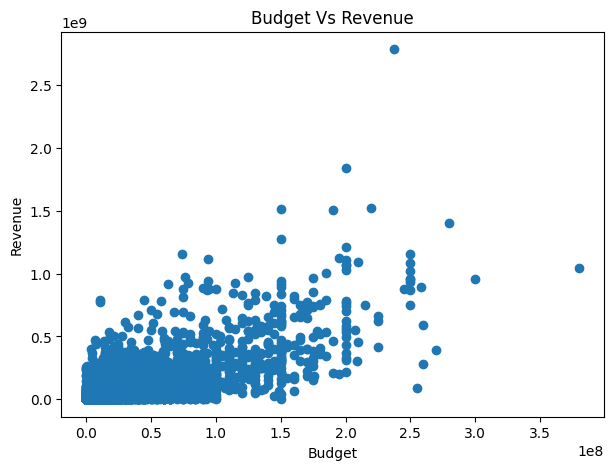

In [598]:
plt.figure(figsize=(7,5))
plt.scatter(df['budget'],df['revenue'])                          # scatter plot of budget vs revenue
plt.title("Budget Vs Revenue")                                   #set title
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.show()                                                       #display the plot

### 🔍 Insight: Year-wise Movie Release Trend
- Certain years show spikes, indicating higher production activity.
- Some years have fewer movies, possibly due to industry changes or missing data.
- Trends help understand growth or decline of movie production over time.


In [599]:
                                                                  # show top 10 movies with highest ratings
df.sort_values(by='vote_average', ascending=False)[['title', 'vote_average']].head(10)


,title,vote_average
4662,Little Big Top,10.0
3519,Stiff Upper Lips,10.0
4045,"Dancer, Texas Pop. 81",10.0
4247,Me You and Five Bucks,10.0
3992,Sardaarji,9.5
2386,One Man's Hero,9.3
1881,The Shawshank Redemption,8.5
2970,There Goes My Baby,8.5
3337,The Godfather,8.4
2796,The Prisoner of Zenda,8.4


### 🔍 Insight: Year-wise Movie Release Trend
- Certain years show spikes, indicating higher production activity.
- Some years have fewer movies, possibly due to industry changes or missing data.
- Trends help understand growth or decline of movie production over time.


In [600]:
df.groupby('director')['revenue'].mean().sort_values(ascending=False).head(10)
                                                                      # top 10 directors with highest average revenue


director
Chris Buck          1.274219e+09
Kyle Balda          1.156731e+09
Lee Unkrich         1.066970e+09
Joss Whedon         9.879437e+08
Chris Renaud        8.759583e+08
James Cameron       8.405099e+08
Roger Allers        7.882418e+08
Tim Miller          7.831130e+08
Colin Trevorrow     7.587683e+08
Robert Stromberg    7.585398e+08
Name: revenue, dtype: float64

--------------------------------------------------------------------------------------------------------------------------------------------------------

### 🔍 Insights from Profit & ROI Analysis

- Highest profit movies have extremely high budgets + large revenues.
- ROI top movies are usually low-budget films.
- Action & Drama genres show consistent positive ROI.
- Budget vs Profit graph shows a moderate positive correlation.
- Some movies earn less despite very high budgets.


--------------------------------------------------------------------------------------------------------------------------------------------------------

In [601]:
df['profit'] = df['revenue'] - df['budget']                             # calculate profit for each movie


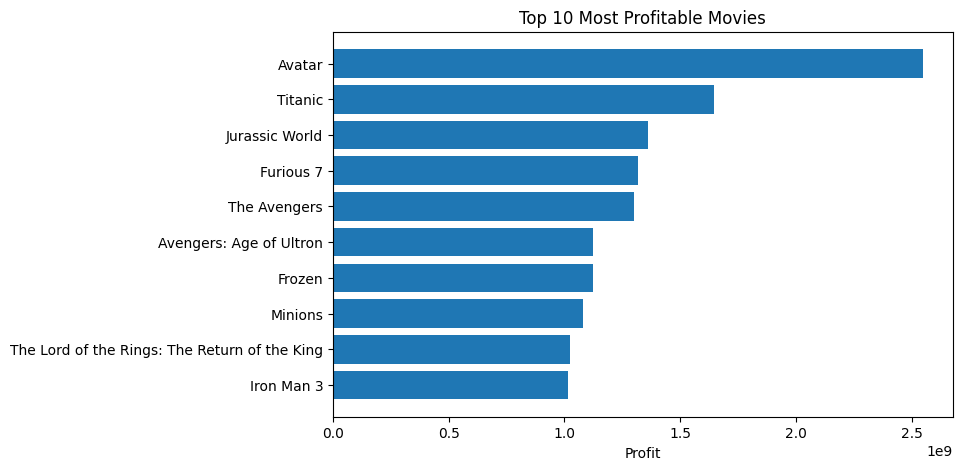

In [602]:
top_profit = df.sort_values(by='profit', ascending=False).head(10)
                                                                           # get top 10 movies with highest profit

plt.figure(figsize=(8,5))
plt.barh(top_profit['title'], top_profit['profit'])                        # horizontal bar chart
plt.xlabel("Profit")
plt.title("Top 10 Most Profitable Movies")
plt.gca().invert_yaxis()                                                   # highest profit at top
plt.show()


In [603]:
df['ROI']=(df['profit']/df['budget']).replace([float('inf'),-float('inf')],0)
                                                                                     # calculate ROI and replace infinite values with 0


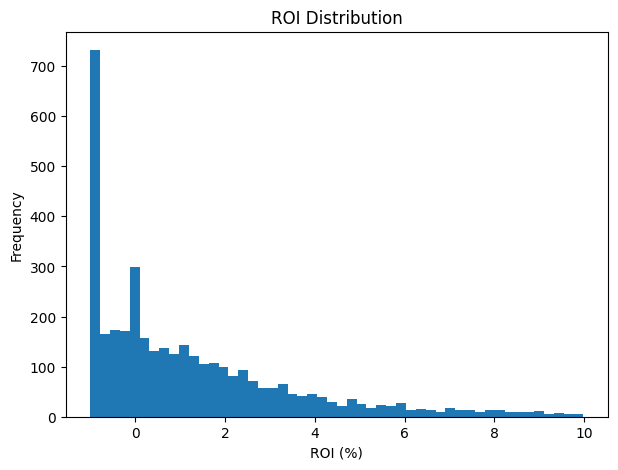

In [604]:
roi_clean = df[df['ROI'] < 10]['ROI']
                                            # filter ROI values to remove extreme outliers

plt.figure(figsize=(7,5))
plt.hist(roi_clean, bins=50)                 # plot ROI distribution
plt.title("ROI Distribution")
plt.xlabel("ROI (%)")
plt.ylabel("Frequency")
plt.show()                        #display the plot


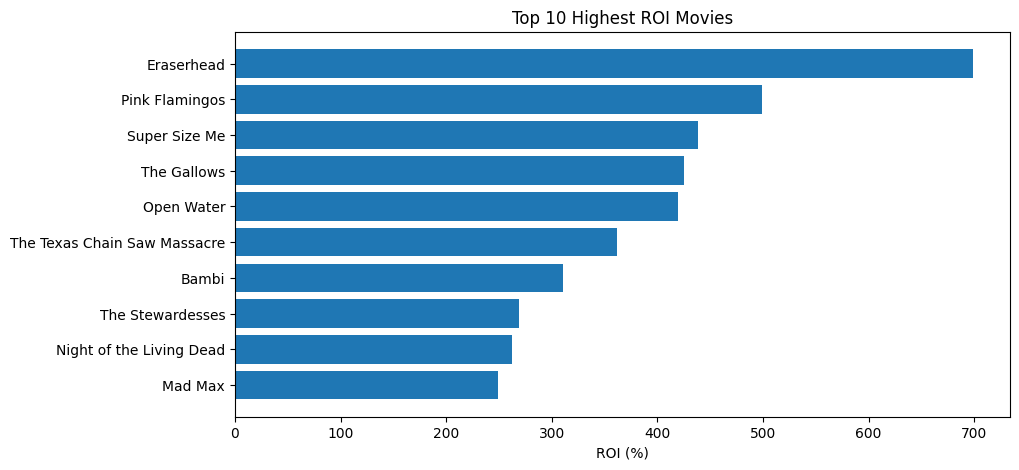

In [605]:
top_roi = df[df['ROI'] < 1000].sort_values(by='ROI', ascending=False).head(10)  
                                                # get top 10 movies with highest ROI after removing extreme values

plt.figure(figsize=(10,5))
plt.barh(top_roi['title'], top_roi['ROI'])                # horizontal bar plot of ROI
plt.xlabel("ROI (%)")
plt.title("Top 10 Highest ROI Movies")
plt.gca().invert_yaxis()                                  # show highest ROI at the top
plt.show()                                                # display the plot


--------------------------------------------------------------------------------------------------------------------------------------------------------

### 📌 Final Summary

This EDA shows how budget, revenue, genres, ratings, popularity, and runtime influence movie performance.  
Profit & ROI analysis gives deep insights into which movies and genres deliver the highest returns.
